In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.lyrics_parser import load_corpus, corpus_stats

list_of_songs = pd.read_csv('lista_canzoni_sanremo.csv')
songs = load_corpus('testi')

print(f"CSV songs: {len(list_of_songs)}, Parsed lyrics: {len(songs)}")
list_of_songs.head()

CSV songs: 1667, Parsed lyrics: 818


,year,artist,song,position,category
0,1951,Nilla Pizzi,Grazie dei fiori,1,Unica
1,1951,Nilla Pizzi,Tutto è finito,NF,Unica
2,1951,Duo Fasano,Sorrentinella,NF,Unica
3,1951,Nilla Pizzi,Oro di Napoli,NF,Unica
4,1951,Nilla Pizzi,Notte di Sanremo,NF,Unica


In [2]:
# finnd due canzoni con lo stesso titolo

# Trova canzoni duplicate in base al titolo (colonna "song")
duplicate_songs = list_of_songs[list_of_songs.duplicated(subset=['song'], keep=False)]
if not duplicate_songs.empty:
    print("Canzoni con titoli duplicati:")
    display(duplicate_songs.sort_values('song'))
else:
    print("Nessuna canzone duplicata trovata.")

Canzoni con titoli duplicati:


,year,artist,song,position,category
996,1999,Daniele Groff,Adesso,NF,Giovani
1473,2018,Diodato e Roy Paci,Adesso,8,Campioni
412,1969,Checco & The Casuals,Alla fine della strada,NF,Unica
401,1969,Junior Magli & The Casuals,Alla fine della strada,14,Unica
1246,2007,Romina Falconi,Ama,NF,Giovani
...,...,...,...,...,...
1177,2005,Sabrina Guida,Vorrei,NF,Giovani
1121,2003,Daniela Pedali,Vorrei,NF,Giovani
665,1990,Mino Reitano,Vorrei,NF,Campioni
190,1960,Fausto Cigliano & Irene D'Areni,È vero,7,Unica


In [3]:
stats = corpus_stats(songs)
stats

{'total_songs': 818,
 'parse_methods': {'bracket_headers': 610,
  'ai_override': 205,
  'bare_labels': 3},
 'total_sections': 5411,
 'avg_sections_per_song': 6.614914425427873,
 'labeled_sections': 5341,
 'unlabeled_sections': 70}

In [4]:
song = [s for s in songs if 'Ciao ciao' in s.title][0]
print(f"{song.title} ({song.year}) — {song.parse_method}, {len(song.sections)} sections\n")
for sec in song.sections:
    print(f"[{sec.label}]")
    print(sec.text)
    print()

Ciao ciao (2022) — bracket_headers, 8 sections

[Strofa 1]
Come stai, bambina?
Dove vai stasera?
Che paura intorno
È la fine del mondo
Sopra la rovina sono una regina (Sono una regina)
Ma-ma-ma-ma non so cosa salvare

[Strofa 2]
Sono a pezzi, già mi manchi
Occhi dolci, cuori infranti
Che spavento, come il vento
Questa terra sparirà
Nel silenzio della crisi generale
Ti saluto con amore

[Ritornello]
Con le mani, con le mani, con le mani
Ciao, ciao
Con i piedi, con i piedi, con i piedi
Ciao, ciao
E con la testa, con il petto, con il cuore
Ciao, ciao
E con le gambe, con il culo, coi miei occhi
Ciao

[Strofa 3]
Questa è l'ora della fine
Romperemo tutte le vеtrine
Tocca a noi, non lo senti, come un'onda arrivеrà
Me lo sento esploderà, esploderà
La fine del mondo è una giostra perfetta
Mi scoppia nel cuore la voglia di festa
La fine del mondo, che dolce disdetta
Mi vien da star male, mi scoppia la testa

[Ritornello]
Con le mani, con le mani, con le mani
Ciao, ciao
E con i piedi, con i piedi

In [5]:
# get count of section labels
section_counts = {}
for song in songs:
    for section in song.sections:
        if section.label not in section_counts:
            section_counts[section.label] = 0
        section_counts[section.label] += 1

# sort section counts by value
sorted_section_counts = sorted(section_counts.items(), key=lambda x: x[1], reverse=True)


# print section counts
print(sorted_section_counts)

[('Ritornello', 2002), ('Strofa 1', 749), ('Strofa 2', 742), ('Outro', 438), ('Bridge', 417), ('Pre-Ritornello', 392), ('Strofa 3', 216), ('Post-Ritornello', 142), ('Intro', 104), (None, 70), ('Strofa', 54), ('Strofa 4', 50), ('Interludio', 13), ('Strofa 5', 9), ('Strofa 6', 5), ('Strumentale', 4), ('Funky-G', 2), ('Pre-Ritornello1', 1), ('Strofa 7', 1)]


In [6]:
# find most common song structure
song_structures = {}
for song in songs:
    structure = []
    for section in song.sections:

        structure.append(section.label)
    song_structures[song.title] = structure

# count same song structure (using tuple of section labels, which are hashable)
song_structure_counts = {}
for song in songs:
    structure = tuple(
        [section.label for section in song.sections if section.label is not None]
    )
    if structure not in song_structure_counts:
        song_structure_counts[structure] = 0
    song_structure_counts[structure] += 1

# eliminate the empty structure
song_structure_counts = {k: v for k, v in song_structure_counts.items() if k}

# sort song structure counts by value
sorted_song_structure_counts = sorted(song_structure_counts.items(), key=lambda x: x[1], reverse=True)

# print song structure counts
print(sorted_song_structure_counts)

[(('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Bridge', 'Ritornello'), 60), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello'), 57), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Bridge', 'Ritornello', 'Outro'), 41), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Outro'), 34), (('Strofa 1', 'Pre-Ritornello', 'Ritornello', 'Strofa 2', 'Pre-Ritornello', 'Ritornello', 'Bridge', 'Ritornello'), 30), (('Strofa 1', 'Pre-Ritornello', 'Ritornello', 'Strofa 2', 'Pre-Ritornello', 'Ritornello', 'Bridge', 'Ritornello', 'Outro'), 26), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Ritornello'), 16), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Strofa 3', 'Ritornello'), 15), (('Strofa 1', 'Pre-Ritornello', 'Ritornello', 'Strofa 2', 'Pre-Ritornello', 'Ritornello'), 13), (('Strofa 1', 'Strofa 2', 'Ritornello', 'Strofa 3', 'Ritornello', 'Outro'), 13), (('Strofa', 'Ritornello', 'Outro'), 13), (('Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Post-Ritorn

In [7]:
# sort song structures by length
sorted_song_structures = sorted(song_structures.items(), key=lambda x: len(x[1]), reverse=True)

# print shortest and longest song structure
print(sorted_song_structures[0])

# shortest not empty song structure
# eliminate empty sections
song_structures = {k: [s for s in v if s is not None] for k, v in song_structures.items()}
# eliminate empty song structures
song_structures = {k: v for k, v in song_structures.items() if v}

# sort song structures by length
sorted_song_structures = sorted(song_structures.items(), key=lambda x: len(x[1]), reverse=True)

# print shortest not empty song structure
print(sorted_song_structures[-2])

('Grazie ma no grazie', ['Strofa 1', 'Pre-Ritornello', 'Ritornello', 'Post-Ritornello', 'Strofa 2', 'Pre-Ritornello', 'Ritornello', 'Post-Ritornello', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge', 'Bridge'])
('Sentimento', ['Outro'])


Songs with fully labeled sections: 809 / 818


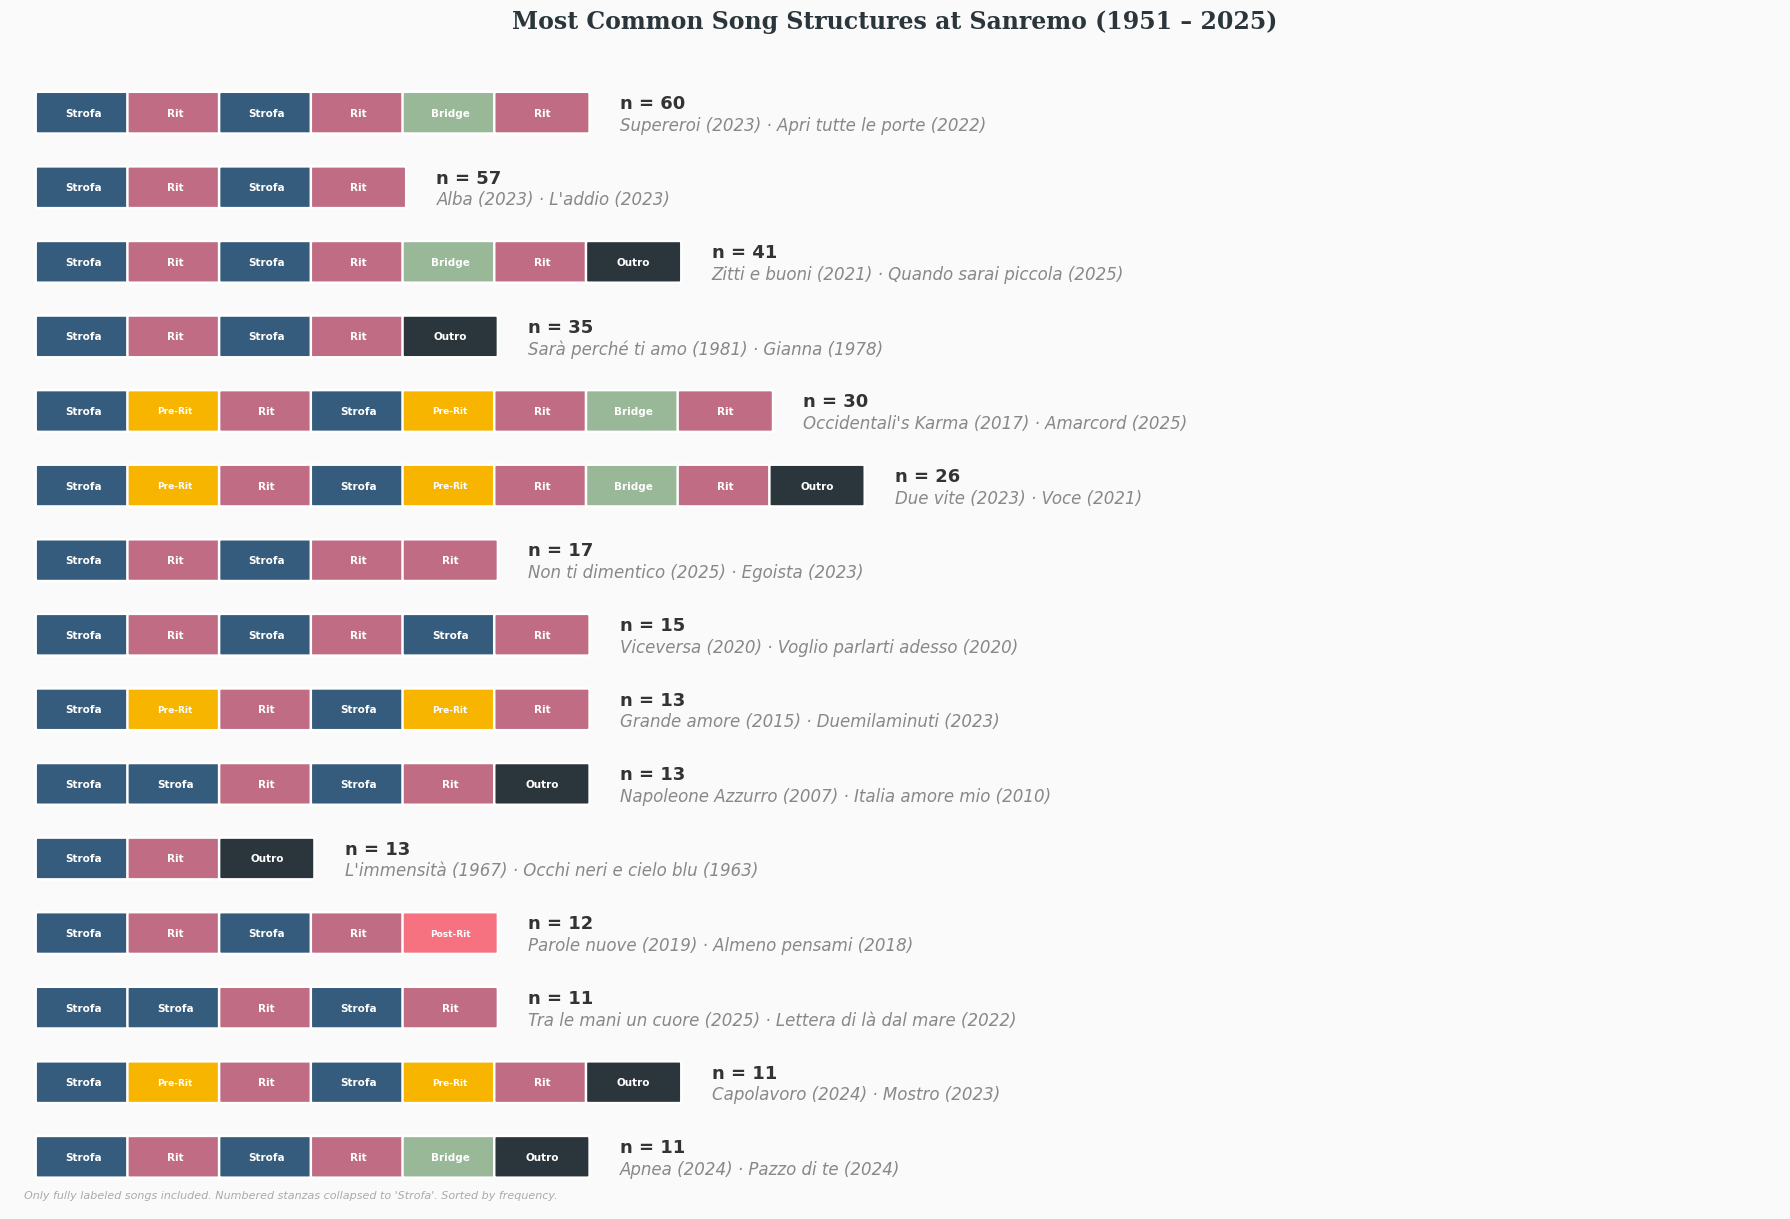

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from collections import Counter

COLORS = {
    "Intro":            "#6C5B7B",
    "Strofa":           "#355C7D",
    "Pre-Ritornello":   "#F8B500",
    "Ritornello":       "#C06C84",
    "Post-Ritornello":  "#F67280",
    "Bridge":           "#99B898",
    "Interludio":       "#A8D8EA",
    "Strumentale":      "#CDCDCD",
    "Outro":            "#2A363B",
}

SHORT = {
    "Pre-Ritornello": "Pre-Rit",
    "Post-Ritornello": "Post-Rit",
    "Ritornello": "Rit",
    "Interludio": "Intl",
    "Strumentale": "Strum",
}

def _section_color(label):
    for key in COLORS:
        if label.startswith(key):
            return COLORS[key]
    return "#E8E8E8"

def _abstract_structure(sections):
    """Collapse numbered strofa → 'Strofa', drop None labels."""
    result = []
    for sec in sections:
        if sec is None:
            continue
        elif sec.startswith("Strofa"):
            result.append("Strofa")
        else:
            result.append(sec)
    return tuple(result)

struct_to_songs = {}
for song in songs:
    labels = [sec.label for sec in song.sections]
    if any(l is None for l in labels):
        continue
    abstract = _abstract_structure(labels)
    if abstract:
        struct_to_songs.setdefault(abstract, []).append(song)

struct_counts = {k: len(v) for k, v in struct_to_songs.items()}
top = sorted(struct_counts.items(), key=lambda x: x[1], reverse=True)[:15]
print(f"Songs with fully labeled sections: {sum(struct_counts.values())} / {len(songs)}")

FAMOUS = [
    "Nel blu dipinto di blu", "Volare", "Zitti e buoni", "Brividi",
    "Soldi", "L'italiano", "Gianna", "Azzurro", "Supereroi", "Ciao ciao",
    "Due vite", "Splendido splendente", "Musica leggerissima",
    "La solitudine", "Con te partirò", "Occidentali's Karma",
    "Fai rumore", "Voce", "Grande amore",
    "Terra promessa", "Sarà perché ti amo", "Felicità",
    "Apri tutte le porte", "Ovunque sarai",
]

def _pick_examples(song_list, n=2):
    ranked = sorted(song_list, key=lambda s: (
        -int(any(f.lower() in s.title.lower() for f in FAMOUS)),
        -s.year if s.year else 0,
    ))
    return ranked[:n]

# --- PLOT ---
n_rows = len(top)
fig, ax = plt.subplots(figsize=(18, n_rows * 0.72 + 1.5))
fig.patch.set_facecolor("#FAFAFA")
ax.set_facecolor("#FAFAFA")

y_positions = list(range(n_rows - 1, -1, -1))
bar_h = 0.52

for yi, (struct, count) in zip(y_positions, top):
    x = 0
    for label in struct:
        color = _section_color(label)
        rect = mpatches.FancyBboxPatch(
            (x, yi - bar_h / 2), 1, bar_h,
            boxstyle="round,pad=0.02", facecolor=color,
            edgecolor="white", linewidth=1.8,
        )
        ax.add_patch(rect)
        short = SHORT.get(label, label)
        fs = 6.5 if len(short) > 6 else 7.5
        ax.text(x + 0.5, yi, short, ha="center", va="center",
                fontsize=fs, color="white", fontweight="bold")
        x += 1

    examples = _pick_examples(struct_to_songs[struct], n=2)
    example_str = " · ".join(f"{s.title} ({s.year})" for s in examples)
    # Make text outside the squares bigger: change fontsize from 9.5 to 13 and from 7.5 to 12
    ax.text(x + 0.35, yi + 0.13, f"n = {count}", fontsize=13,
            fontweight="bold", color="#333", va="center")
    ax.text(x + 0.35, yi - 0.16, example_str, fontsize=12,
            color="#888", va="center", style="italic")

max_len = max(len(struct) for struct, _ in top)
ax.set_xlim(-0.3, max_len + 10)
ax.set_ylim(-0.7, n_rows - 0.2)
ax.set_yticks([])
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Most Common Song Structures at Sanremo (1951 – 2025)",
             fontsize=17, fontweight="bold", pad=18, color="#2A363B",
             fontfamily="serif")
ax.text(-0.15, -0.55, "Only fully labeled songs included. Numbered stanzas collapsed to 'Strofa'. Sorted by frequency.",
        fontsize=8, color="#AAA", style="italic")

legend_labels = ["Intro", "Strofa", "Pre-Ritornello", "Ritornello",
                 "Post-Ritornello", "Bridge", "Interludio", "Outro"]
legend_handles = [mpatches.Patch(facecolor=COLORS[l], edgecolor="white",
                                  label=l) for l in legend_labels]
# ax.legend(handles=legend_handles, loc="upper right", fontsize=8.5,
#           framealpha=0.95, edgecolor="#ddd", ncol=2, title="Section Types",
#           title_fontsize=9)

plt.tight_layout()
plt.savefig("song_structures.png", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
# salva anche in svg nella cartella svg
plt.savefig("svg/song_structures.svg", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
plt.show()

In [9]:
## most winning song structure
# find the song structure with the most wins
# unite songs and list_of_songs
list_of_songs['structure'] = list_of_songs['song'].apply(lambda x: song_structures[x] if x in song_structures else None)
list_of_songs['winner'] = list_of_songs['position'] == '1'

# lets see some winning songs (Unica + Big + Campioni = main competition, not Giovani)
winning_songs = list_of_songs[(list_of_songs['winner'] == True) & (list_of_songs['category'].isin(['Unica', 'Big', 'Campioni']))]
winning_songs.tail(30)

,year,artist,song,position,category,structure,winner
892,1996,Ron & Tosca,Vorrei incontrarti fra cent'anni,1,Campioni,"[Strofa 1, Strofa 2, Ritornello, Strofa 3, Bri...",True
936,1997,Jalisse,Fiumi di parole,1,Campioni,None,True
969,1998,Annalisa Minetti,Senza te o con te,1,Campioni,"[Intro, Strofa 1, Pre-Ritornello, Ritornello, ...",True
985,1999,Anna Oxa,Senza pieta,1,Campioni,"[Strofa 1, Ritornello, Strofa 2, Ritornello, B...",True
1028,2000,Piccola Orchestra Avion Travel,Sentimento,1,Campioni,[Outro],True
1068,2001,Elisa,Luce (Tramonti a nord est),1,Campioni,"[Strofa 1, Pre-Ritornello, Ritornello, Strofa ...",True
1096,2002,Matia Bazar,Messaggio d'amore,1,Campioni,None,True
1131,2003,Alexia,Per dire di no,1,Campioni,"[Strofa 1, Strofa 2, Strofa 3, Ritornello, Str...",True
1161,2004,Marco Masini,L'uomo volante,1,Campioni,"[Intro, Strofa 1, Ritornello, Strofa 2, Ritorn...",True
1187,2005,Francesco Renga,Angelo,1,Campioni,"[Strofa 1, Ritornello, Strofa 2, Ritornello, B...",True


In [10]:
list_of_songs.loc[list_of_songs['song'] == 'Supereroi'].structure.tolist()

[['Strofa 1', 'Ritornello', 'Strofa 2', 'Ritornello', 'Bridge', 'Ritornello']]

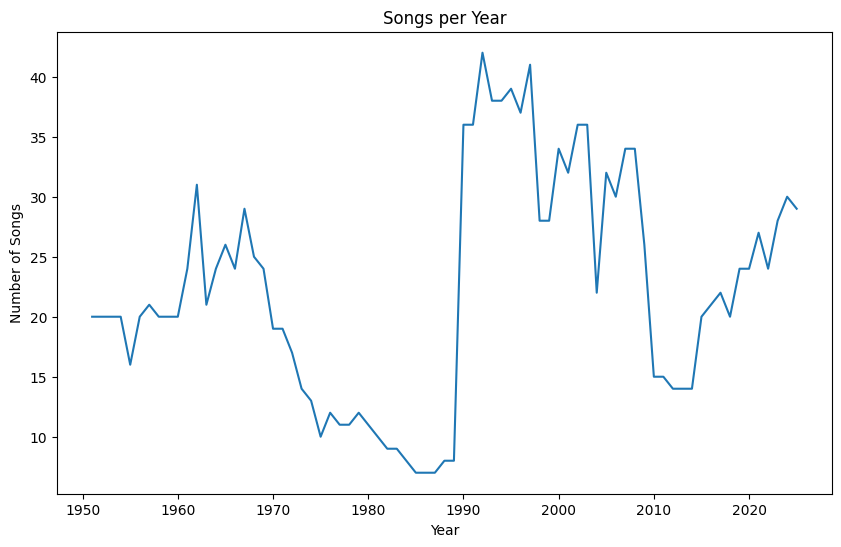

In [11]:
# songs per year 

# plot songs per year
plt.figure(figsize=(10, 6))
plt.plot(list_of_songs['year'].value_counts().sort_index())
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per Year')
plt.show()


Winners with structures: 75 / 75


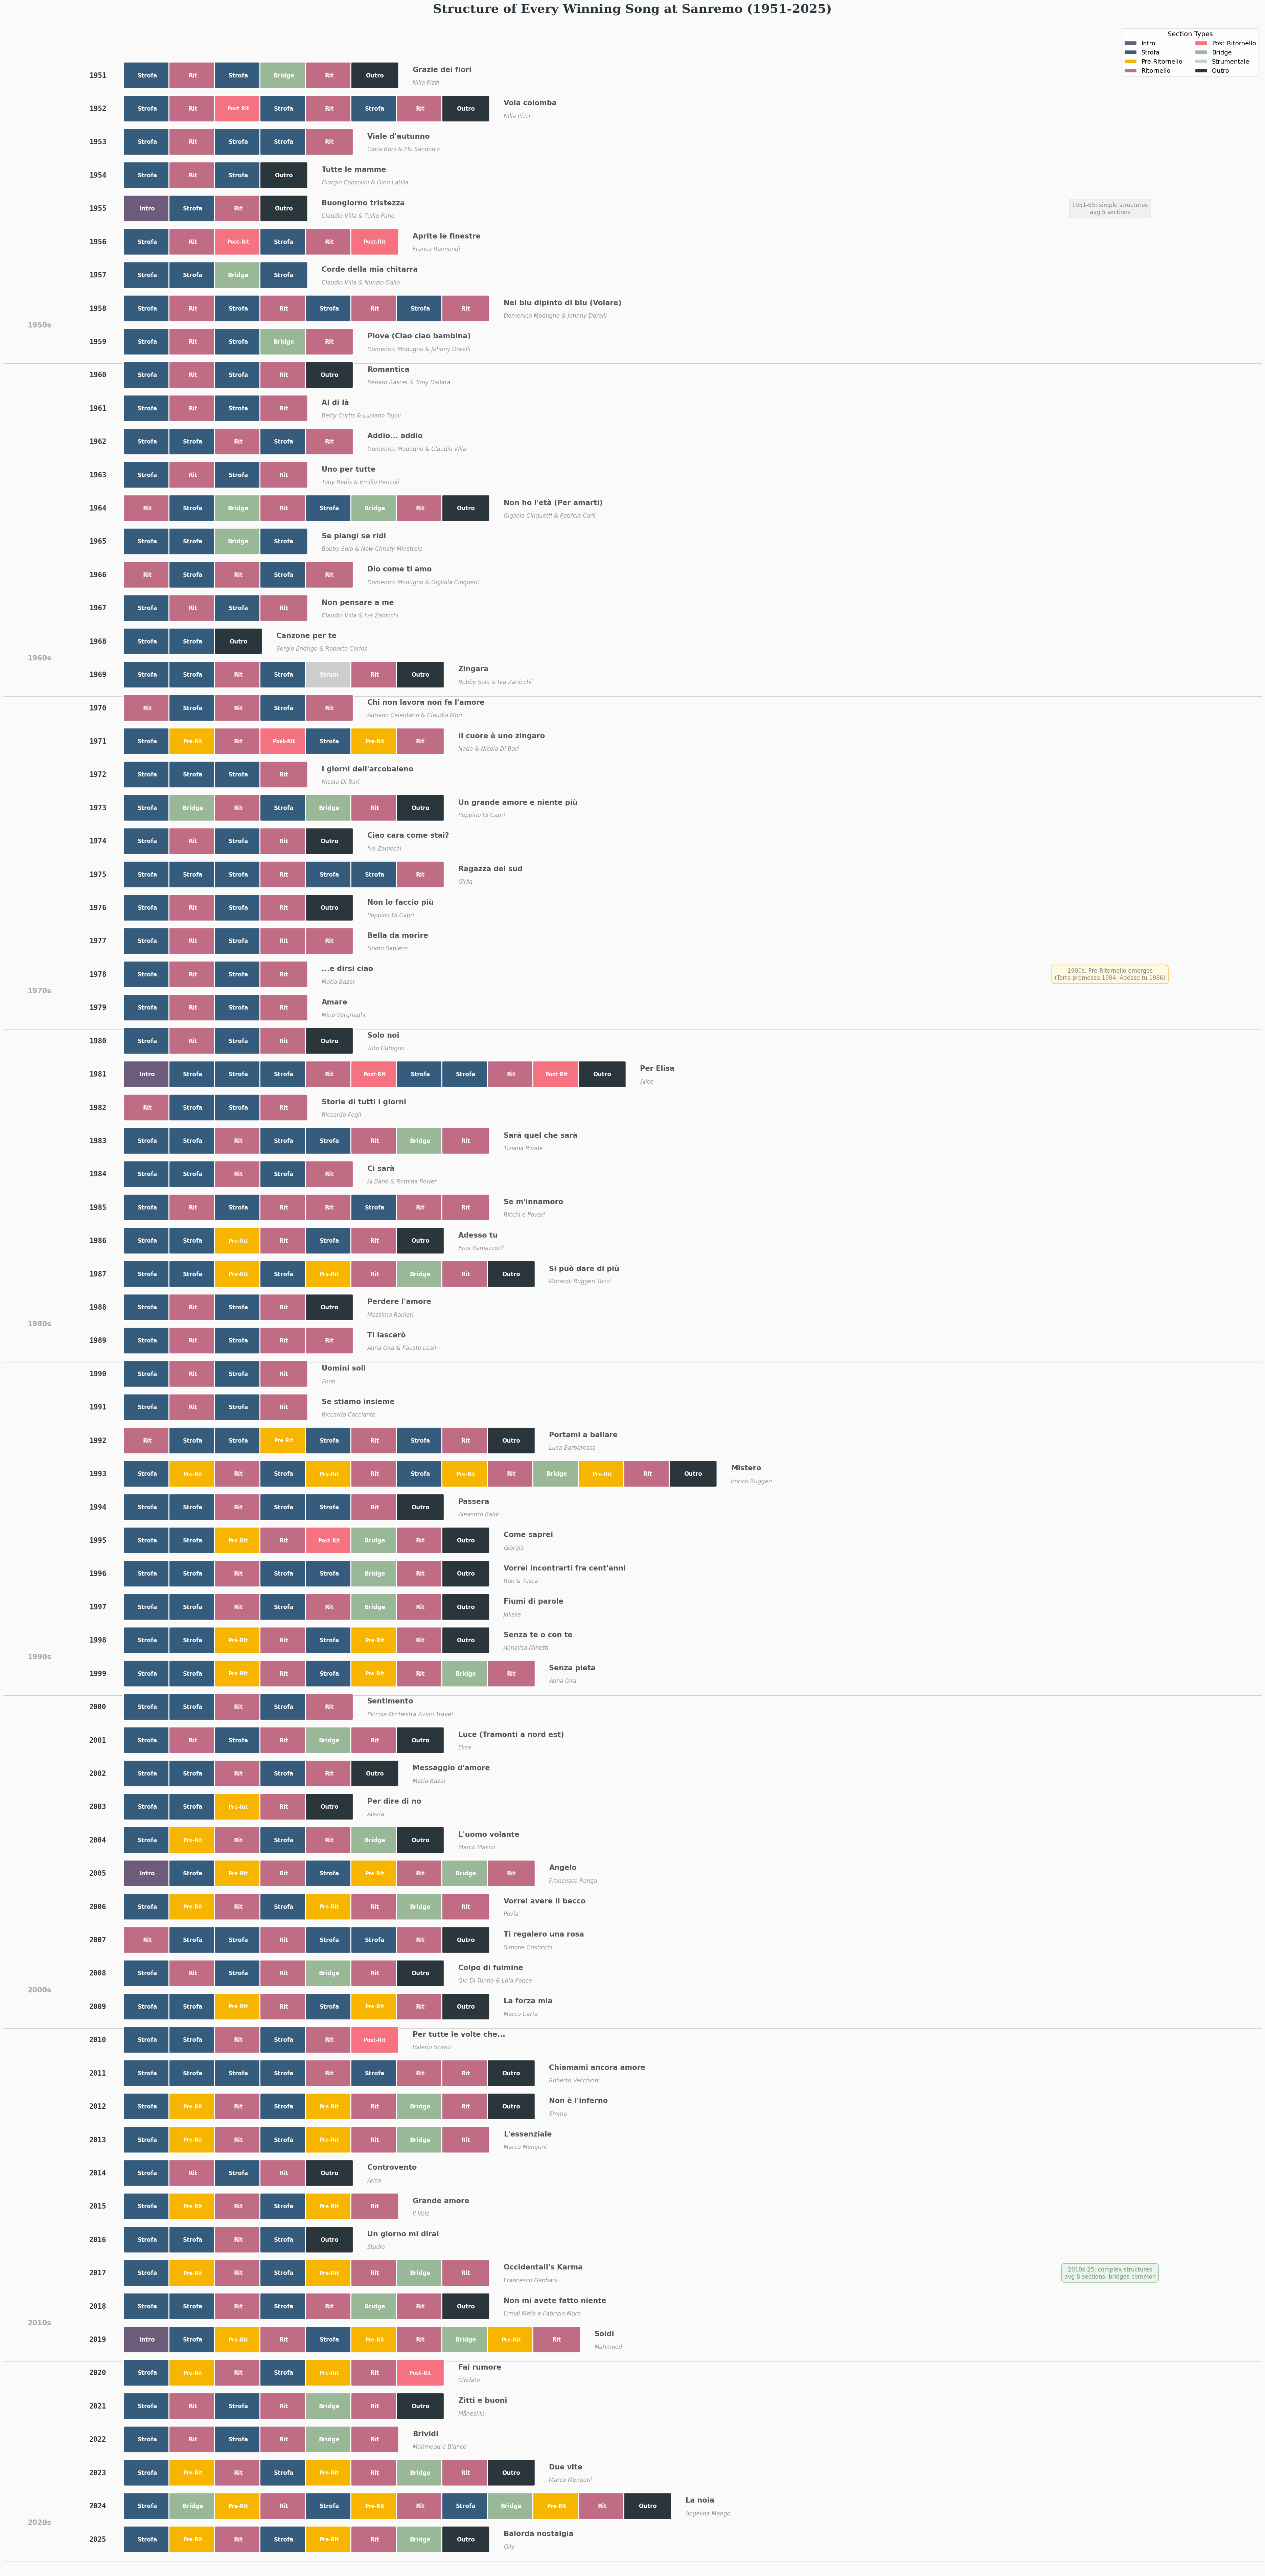

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

CURATED_STRUCTURES = {
    # --- Unica era: songs without lyrics or with unlabeled sections ---
    (1951, "Grazie dei fiori"): ["Strofa 1", "Ritornello", "Strofa 2", "Bridge", "Ritornello", "Outro"],
    (1952, "Vola colomba"): ["Strofa 1", "Ritornello", "Post-Ritornello", "Strofa 2", "Ritornello", "Strofa 3", "Ritornello", "Outro"],
    (1953, "Viale d'autunno"): ["Strofa 1", "Ritornello", "Strofa 2", "Strofa 3", "Ritornello"],
    (1957, "Corde della mia chitarra"): ["Strofa 1", "Strofa 2", "Bridge", "Strofa 3"],  # AABA form typical of 1950s
    (1959, "Piove (Ciao ciao bambina)"): ["Strofa 1", "Ritornello", "Strofa 2", "Bridge", "Ritornello"],
    (1960, "Romantica"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello", "Outro"],
    (1961, "Al di là"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello"],
    (1962, "Addio... addio"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Ritornello"],
    (1963, "Uno per tutte"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello"],
    (1964, "Non ho l'età (Per amarti)"): ["Ritornello", "Strofa 1", "Bridge", "Ritornello", "Strofa 2", "Bridge", "Ritornello", "Outro"],
    (1966, "Dio come ti amo"): ["Ritornello", "Strofa 1", "Ritornello", "Strofa 2", "Ritornello"],
    (1967, "Non pensare a me"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello"],
    (1969, "Zingara"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Strumentale", "Ritornello", "Outro"],
    (1971, "Il cuore è uno zingaro"): ["Strofa 1", "Pre-Ritornello", "Ritornello", "Post-Ritornello", "Strofa 2", "Pre-Ritornello", "Ritornello"],
    (1972, "I giorni dell'arcobaleno"): ["Strofa 1", "Strofa 2", "Strofa 3", "Ritornello"],
    (1974, "Ciao cara come stai?"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello", "Outro"],
    (1975, "Ragazza del sud"): ["Strofa 1", "Strofa 2", "Strofa 3", "Ritornello", "Strofa 4", "Strofa 5", "Ritornello"],
    (1978, "...e dirsi ciao"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello"],  # verified from lyrics
    (1980, "Solo noi"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello", "Outro"],
    (1982, "Storie di tutti i giorni"): ["Ritornello", "Strofa 1", "Strofa 2", "Ritornello"],
    (1983, "Sarà quel che sarà"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Strofa 4", "Ritornello", "Bridge", "Ritornello"],
    # --- Big era: unlabeled songs ---
    (1986, "Adesso tu"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Strofa 3", "Ritornello", "Outro"],
    (1987, "Si può dare di più"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Strofa 3", "Pre-Ritornello", "Ritornello", "Bridge", "Ritornello", "Outro"],
    # --- Campioni era: songs without parsed lyrics ---
    (1992, "Portami a ballare"): ["Ritornello", "Strofa 1", "Strofa 2", "Pre-Ritornello", "Strofa 3", "Ritornello", "Strofa 4", "Ritornello", "Outro"],
    (1993, "Mistero"): ["Strofa 1", "Pre-Ritornello", "Ritornello", "Strofa 2", "Pre-Ritornello", "Ritornello", "Strofa 3", "Pre-Ritornello", "Ritornello", "Bridge", "Pre-Ritornello", "Ritornello", "Outro"],
    (1994, "Passera"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Strofa 4", "Ritornello", "Outro"],
    (1995, "Come saprei"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Post-Ritornello", "Bridge", "Ritornello", "Outro"],
    (1996, "Vorrei incontrarti fra cent'anni"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Strofa 4", "Bridge", "Ritornello", "Outro"],
    (1997, "Fiumi di parole"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Ritornello", "Bridge", "Ritornello", "Outro"],
    (1998, "Senza te o con te"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Strofa 3", "Pre-Ritornello", "Ritornello", "Outro"],
    (1999, "Senza pieta"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Strofa 3", "Pre-Ritornello", "Ritornello", "Bridge", "Ritornello"],
    (2000, "Sentimento"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Ritornello"],
    (2001, "Luce (Tramonti a nord est)"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello", "Bridge", "Ritornello", "Outro"],
    (2002, "Messaggio d'amore"): ["Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Ritornello", "Outro"],
    (2003, "Per dire di no"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Outro"],
    (2004, "L'uomo volante"): ["Strofa 1", "Pre-Ritornello", "Ritornello", "Strofa 2", "Ritornello", "Bridge", "Outro"],
    (2005, "Angelo"): ["Intro", "Strofa 1", "Pre-Ritornello", "Ritornello", "Strofa 2", "Pre-Ritornello", "Ritornello", "Bridge", "Ritornello"],
    (2006, "Vorrei avere il becco"): ["Strofa 1", "Pre-Ritornello", "Ritornello", "Strofa 2", "Pre-Ritornello", "Ritornello", "Bridge", "Ritornello"],
    (2007, "Ti regalero una rosa"): ["Ritornello", "Strofa 1", "Strofa 2", "Ritornello", "Strofa 3", "Strofa 4", "Ritornello", "Outro"],
    (2008, "Colpo di fulmine"): ["Strofa 1", "Ritornello", "Strofa 2", "Ritornello", "Bridge", "Ritornello", "Outro"],
    (2009, "La forza mia"): ["Strofa 1", "Strofa 2", "Pre-Ritornello", "Ritornello", "Strofa 3", "Pre-Ritornello", "Ritornello", "Outro"],
    (2011, "Chiamami ancora amore"): ["Strofa 1", "Strofa 2", "Strofa 3", "Strofa 4", "Ritornello", "Strofa 5", "Ritornello", "Ritornello", "Outro"],
}

SHORT = {
    "Pre-Ritornello": "Pre-Rit",
    "Post-Ritornello": "Post-Rit",
    "Ritornello": "Rit",
    "Interludio": "Intl",
    "Strumentale": "Strum",
}

def _short_label(label):
    if label is None:
        return "?"
    for key in SHORT:
        if label.startswith(key):
            return SHORT[key]
    if label.startswith("Strofa"):
        return "Strofa"
    return label

# Include Unica (1951-1983), Big (1984-1989), and Campioni (1990-2025) winners
winners_df = list_of_songs[
    (list_of_songs['position'] == '1') &
    (list_of_songs['category'].isin(['Unica', 'Big', 'Campioni']))
].sort_values('year')
song_map = {(s.title.lower().strip(), s.year): s for s in songs}

winner_data = []
for _, row in winners_df.iterrows():
    year, title = int(row['year']), str(row['song']).strip()
    artist = str(row['artist']).strip()

    curated = CURATED_STRUCTURES.get((year, title))
    if curated:
        winner_data.append((year, artist, title, None, curated))
        continue

    s = song_map.get((title.lower(), year))
    if not s:
        for (t, y), song in song_map.items():
            if y == year and (title.lower() in t or t in title.lower()):
                s = song
                break
    if s:
        labels = [sec.label for sec in s.sections]
        if all(l is None for l in labels):
            labels = curated if curated else labels
        winner_data.append((year, artist, title, s, labels))

print(f"Winners with structures: {len(winner_data)} / {len(winners_df)}")

# --- Colors ---
COLORS_W = {
    "Intro": "#6C5B7B", "Strofa": "#355C7D", "Pre-Ritornello": "#F8B500",
    "Ritornello": "#C06C84", "Post-Ritornello": "#F67280", "Bridge": "#99B898",
    "Interludio": "#A8D8EA", "Strumentale": "#CDCDCD", "Outro": "#2A363B",
    None: "#BBBBBB",
}

def _sc(label):
    if label is None: return COLORS_W[None]
    for k in COLORS_W:
        if k and label.startswith(k): return COLORS_W[k]
    return COLORS_W[None]

# --- Sizing: fit the longest song (13 sections) without overflow ---
max_s = max(len(l) for *_, l in winner_data) if winner_data else 13  # Mistero = 13
bw = 1.5       # box width
bar_h = 0.72   # box height
fig_w = max_s * bw + 18  # enough room for boxes + title/artist text

n = len(winner_data)
fig, ax = plt.subplots(figsize=(fig_w, n * 0.95 + 5))
fig.patch.set_facecolor("#FAFAFA"); ax.set_facecolor("#FAFAFA")

for i, (year, artist, title, s, labels) in enumerate(reversed(winner_data)):
    ax.text(-0.6, i, str(year), fontsize=15, fontweight="bold", color="#333",
            ha="right", va="center", fontfamily="monospace")
    x = 0
    for label in labels:
        rect = mpatches.FancyBboxPatch((x, i - bar_h/2), bw, bar_h,
            boxstyle="round,pad=0.04", facecolor=_sc(label), edgecolor="white", linewidth=2.2)
        ax.add_patch(rect)
        short = _short_label(label)
        fs = 10.5 if len(short) > 6 else 12
        ax.text(x + bw/2, i, short, ha="center", va="center",
                fontsize=fs, color="white", fontweight="bold")
        x += bw
    ax.text(x + 0.5, i + 0.17, title, fontsize=15, color="#555", va="center", fontweight="bold")
    ax.text(x + 0.5, i - 0.22, artist, fontsize=12, color="#999", va="center", style="italic")

# Decade dividers
decades_seen = {}
for i, (year, *_) in enumerate(reversed(winner_data)):
    d = (year // 10) * 10
    if d not in decades_seen:
        decades_seen[d] = i
        ax.axhline(y=i - 0.65, color="#ccc", linewidth=0.7, zorder=0)
        ax.text(-3.2, i + 0.5, f"{d}s", fontsize=15, fontweight="bold", color="#aaa", va="center")

# Annotations
pre1985 = [(y, l) for y, _, _, _, l in winner_data if y < 1985]
post1985 = [(y, l) for y, _, _, _, l in winner_data if y >= 1985]
early_counts = [len(l) for _, l in pre1985]
late_counts = [len(l) for _, l in post1985]

annot_x = max_s * bw + 13
ax.annotate(f"1951-65: simple structures\navg {np.mean(early_counts[:15]):.0f} sections",
    xy=(annot_x, n - 5), fontsize=12, color="#888", ha="center", va="center",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0", edgecolor="#ddd"))
ax.annotate(f"1980s: Pre-Ritornello emerges\n(Terra promessa 1984, Adesso tu 1986)",
    xy=(annot_x, n - 28), fontsize=12, color="#888", ha="center", va="center",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="#FFF8E1", edgecolor="#F8B500"))
ax.annotate(f"2010s-25: complex structures\navg {np.mean(late_counts[-16:]):.0f} sections, bridges common",
    xy=(annot_x, 8), fontsize=12, color="#888", ha="center", va="center",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="#E8F5E9", edgecolor="#99B898"))

ax.set_xlim(-4.0, max_s * bw + 18); ax.set_ylim(-1.0, n + 0.5)
ax.set_yticks([]); ax.set_xticks([])
for sp in ax.spines.values(): sp.set_visible(False)
ax.set_title("Structure of Every Winning Song at Sanremo (1951-2025)",
             fontsize=26, fontweight="bold", pad=28, color="#2A363B", fontfamily="serif")

legend_labels = ["Intro", "Strofa", "Pre-Ritornello", "Ritornello",
                 "Post-Ritornello", "Bridge", "Strumentale", "Outro"]
ax.legend(handles=[mpatches.Patch(facecolor=COLORS_W[l], edgecolor="white", label=l)
    for l in legend_labels], loc="upper right", fontsize=13,
    framealpha=0.95, edgecolor="#ddd", ncol=2, title="Section Types", title_fontsize=14)

plt.tight_layout()
plt.savefig("winners_structures.png", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
plt.savefig("svg/winners_structures.svg", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
plt.show()

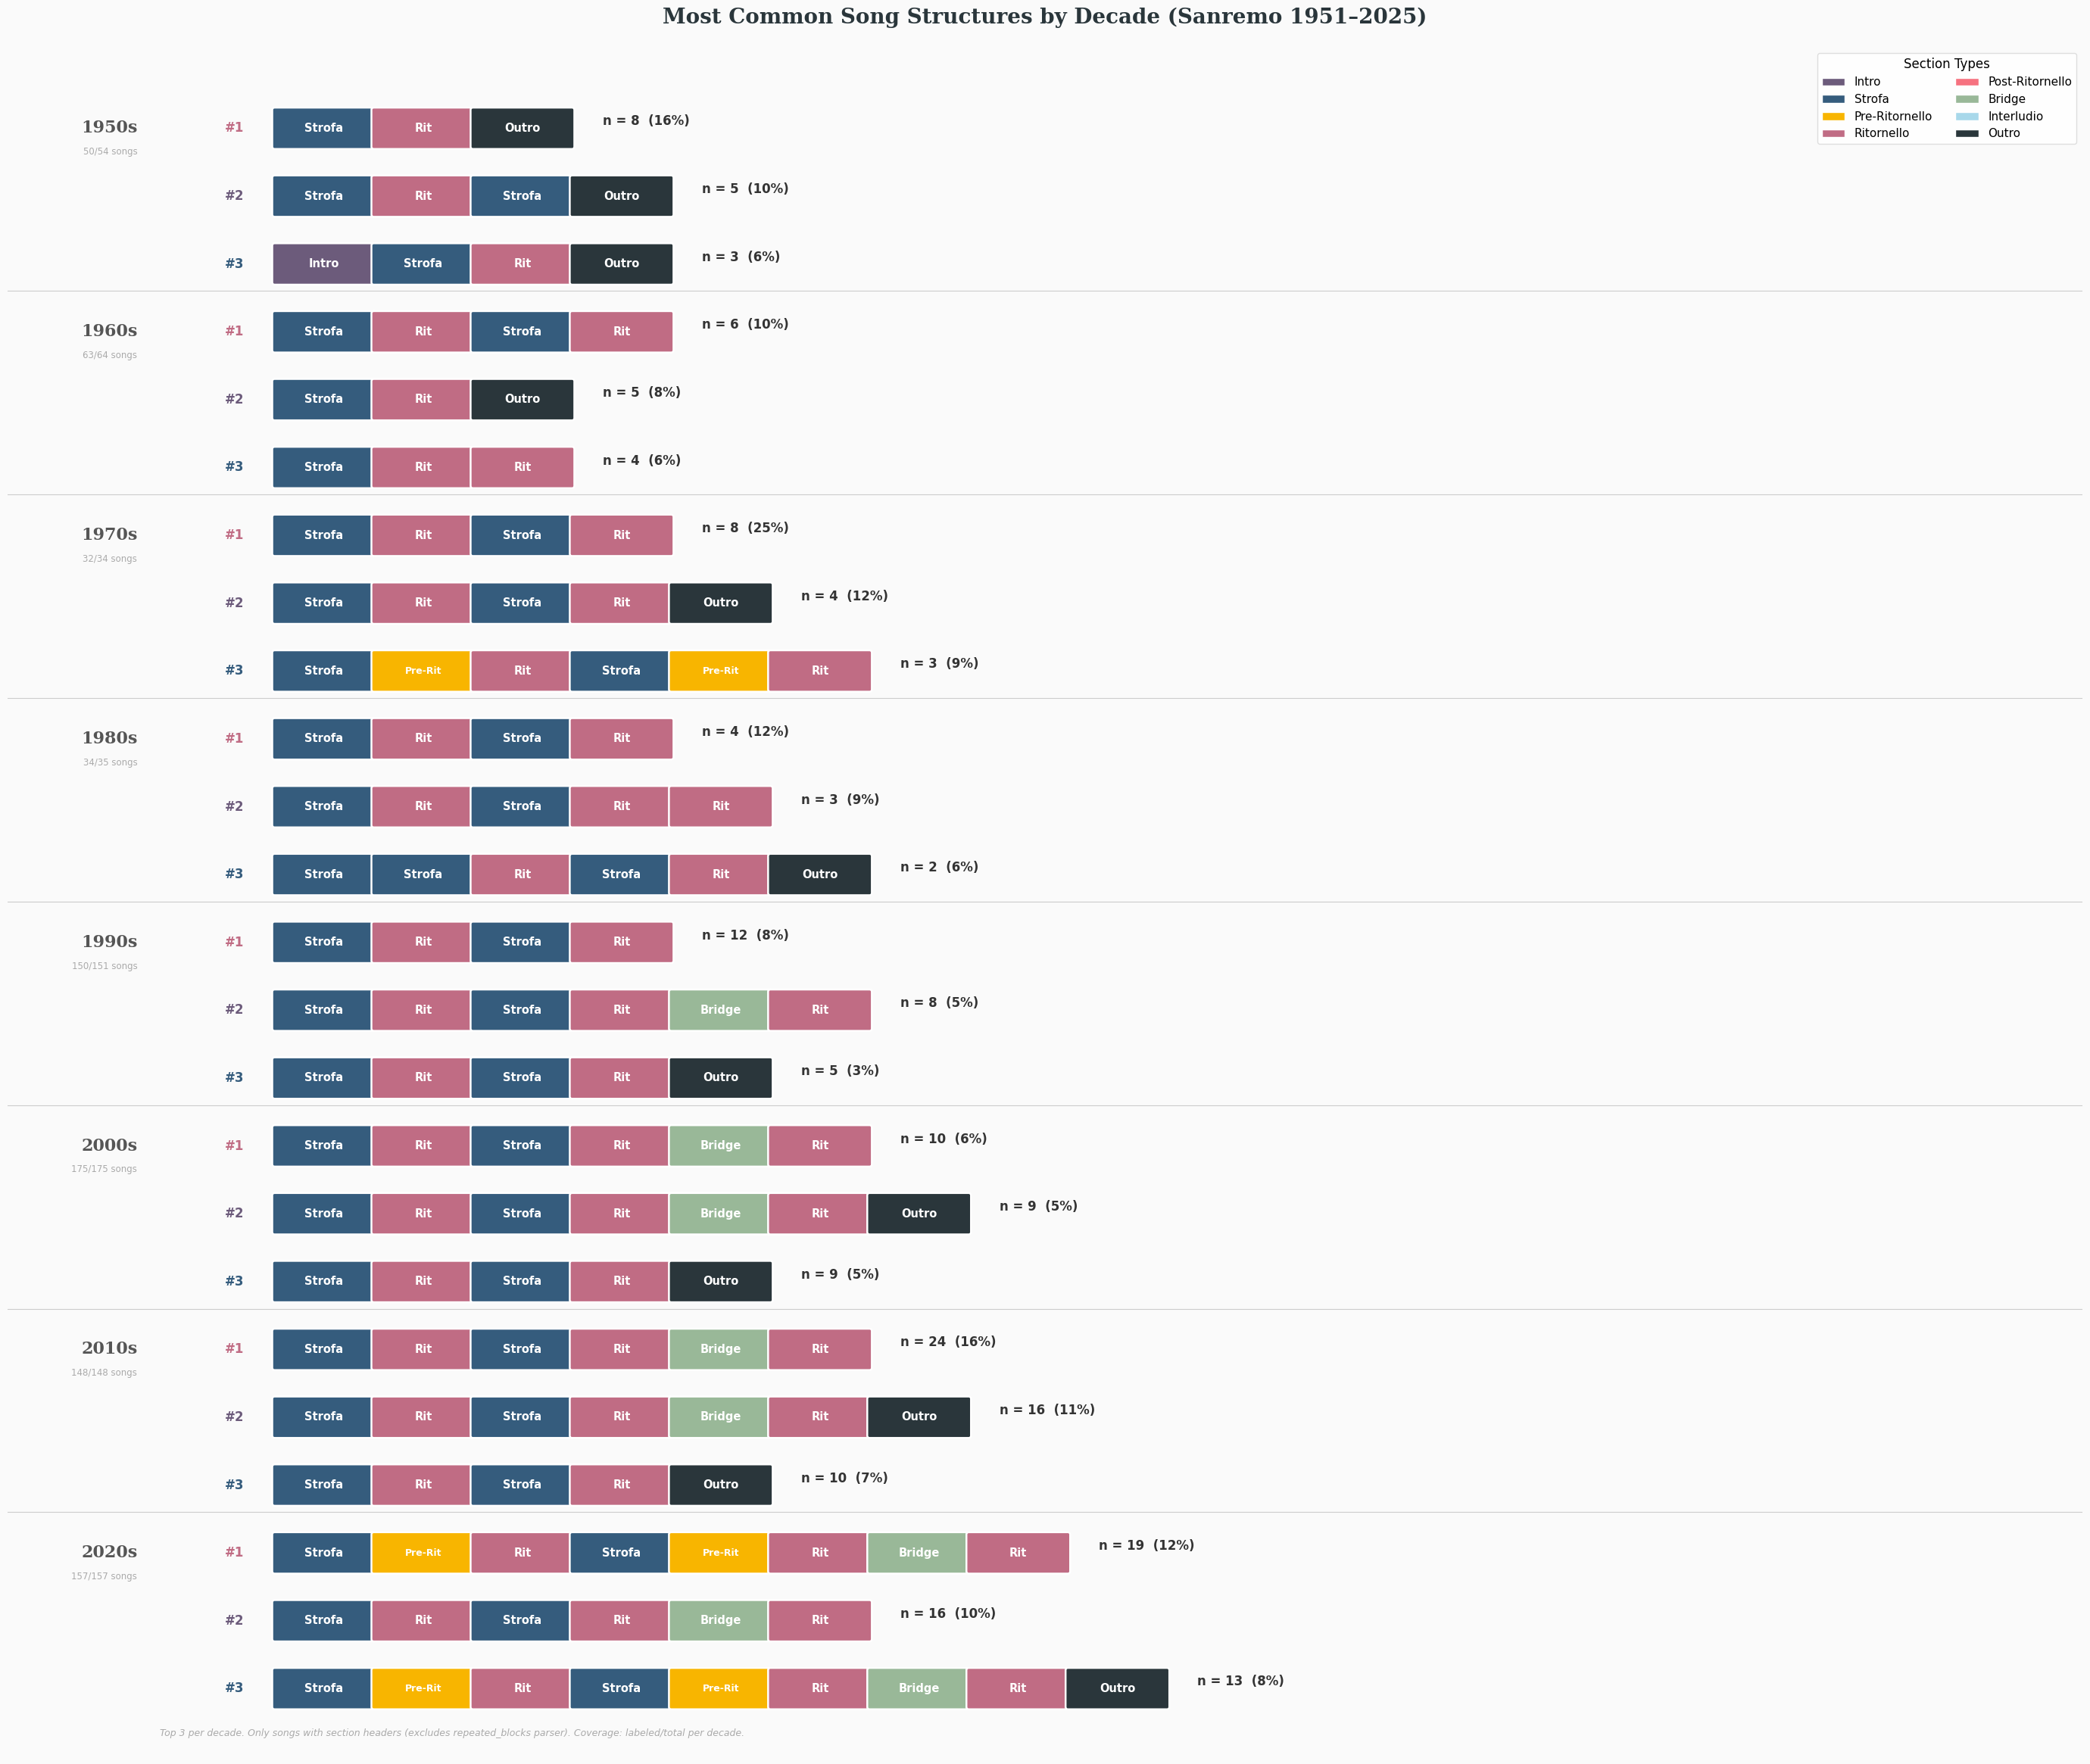


--- Summary ---
  1950s: 50/54 labeled — #1 = Strofa → Ritornello → Outro (8x, 16%)
  1960s: 63/64 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello (6x, 10%)
  1970s: 32/34 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello (8x, 25%)
  1980s: 34/35 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello (4x, 12%)
  1990s: 150/151 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello (12x, 8%)
  2000s: 175/175 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello → Bridge → Ritornello (10x, 6%)
  2010s: 148/148 labeled — #1 = Strofa → Ritornello → Strofa → Ritornello → Bridge → Ritornello (24x, 16%)
  2020s: 157/157 labeled — #1 = Strofa → Pre-Ritornello → Ritornello → Strofa → Pre-Ritornello → Ritornello → Bridge → Ritornello (19x, 12%)


In [13]:
## Most Common Song Structure by Decade

from collections import Counter, defaultdict

# Group fully-labeled songs by decade
# Exclude repeated_blocks — that parser can only detect Strofa/Ritornello,
# producing artificially simple structures for songs without bracket headers.
decade_structs = defaultdict(list)
decade_total = defaultdict(int)
for song in songs:
    decade = (song.year // 10) * 10
    decade_total[decade] += 1
    if song.parse_method == "repeated_blocks":
        continue
    labels = [sec.label for sec in song.sections]
    if any(l is None for l in labels):
        continue
    abstract = _abstract_structure(labels)
    if not abstract:
        continue
    decade_structs[decade].append(abstract)

# Top 3 structures per decade (skip decades with < 5 labeled songs)
TOP_N = 3
decades = sorted(d for d in decade_structs if len(decade_structs[d]) >= 5)

rows = []
for d in decades:
    n_labeled = len(decade_structs[d])
    n_total = decade_total[d]
    counts = Counter(decade_structs[d]).most_common(TOP_N)
    for rank, (struct, cnt) in enumerate(counts):
        rows.append((f"{d}s", rank, struct, cnt, n_labeled, n_total))

# --- PLOT ---
n_rows = len(rows)
bw = 1.3
bar_h = 0.55
max_len = max(len(struct) for _, _, struct, _, _, _ in rows)
fig_w = max_len * bw + 16

fig, ax = plt.subplots(figsize=(fig_w, n_rows * 0.85 + 3))
fig.patch.set_facecolor("#FAFAFA")
ax.set_facecolor("#FAFAFA")

yi = n_rows - 1
prev_decade = None
for decade_label, rank, struct, cnt, n_labeled, n_total in rows:
    if decade_label != prev_decade:
        if prev_decade is not None:
            ax.axhline(y=yi + 0.6, color="#ccc", linewidth=0.8, zorder=0)
        ax.text(-1.8, yi, decade_label, fontsize=16, fontweight="bold",
                color="#555", ha="right", va="center", fontfamily="serif")
        ax.text(-1.8, yi - 0.35, f"{n_labeled}/{n_total} songs",
                fontsize=8.5, color="#aaa", ha="right", va="center")
        prev_decade = decade_label

    badge_colors = ["#C06C84", "#6C5B7B", "#355C7D"]
    badge_c = badge_colors[rank] if rank < 3 else "#999"
    ax.text(-0.4, yi, f"#{rank+1}", fontsize=12, fontweight="bold",
            color=badge_c, ha="right", va="center")

    x = 0
    for label in struct:
        color = _section_color(label)
        rect = mpatches.FancyBboxPatch(
            (x, yi - bar_h / 2), bw, bar_h,
            boxstyle="round,pad=0.03", facecolor=color,
            edgecolor="white", linewidth=1.8,
        )
        ax.add_patch(rect)
        short = SHORT.get(label, label)
        fs = 9 if len(short) > 6 else 10.5
        ax.text(x + bw / 2, yi, short, ha="center", va="center",
                fontsize=fs, color="white", fontweight="bold")
        x += bw

    pct = cnt / n_labeled * 100
    ax.text(x + 0.4, yi + 0.1, f"n = {cnt}  ({pct:.0f}%)", fontsize=12,
            fontweight="bold", color="#333", va="center")
    yi -= 1

ax.set_xlim(-3.5, max_len * bw + 12)
ax.set_ylim(-1.0, n_rows + 0.2)
ax.set_yticks([])
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Most Common Song Structures by Decade (Sanremo 1951–2025)",
             fontsize=20, fontweight="bold", pad=22, color="#2A363B", fontfamily="serif")
ax.text(-1.5, -0.7,
        "Top 3 per decade. Only songs with section headers (excludes repeated_blocks parser). "
        "Coverage: labeled/total per decade.",
        fontsize=9, color="#AAA", style="italic")

legend_labels = ["Intro", "Strofa", "Pre-Ritornello", "Ritornello",
                 "Post-Ritornello", "Bridge", "Interludio", "Outro"]
legend_handles = [mpatches.Patch(facecolor=COLORS[l], edgecolor="white", label=l)
                  for l in legend_labels]
ax.legend(handles=legend_handles, loc="upper right", fontsize=11,
          framealpha=0.95, edgecolor="#ddd", ncol=2, title="Section Types",
          title_fontsize=12)

plt.tight_layout()
plt.savefig("structures_by_decade.png", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
plt.savefig("svg/structures_by_decade.svg", dpi=150, bbox_inches="tight", facecolor="#FAFAFA")
plt.show()

# Summary
print("\n--- Summary ---")
for d in sorted(decade_structs):
    n_lab = len(decade_structs[d])
    n_tot = decade_total[d]
    if n_lab < 5:
        print(f"  {d}s: only {n_lab}/{n_tot} labeled (skipped)")
        continue
    top1 = Counter(decade_structs[d]).most_common(1)[0]
    print(f"  {d}s: {n_lab}/{n_tot} labeled — #1 = {' → '.join(top1[0])} ({top1[1]}x, {top1[1]/n_lab*100:.0f}%)")